In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [6]:
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Zad
Proszę narysować dane za pomoca 
```python
sns.pairplot()
```

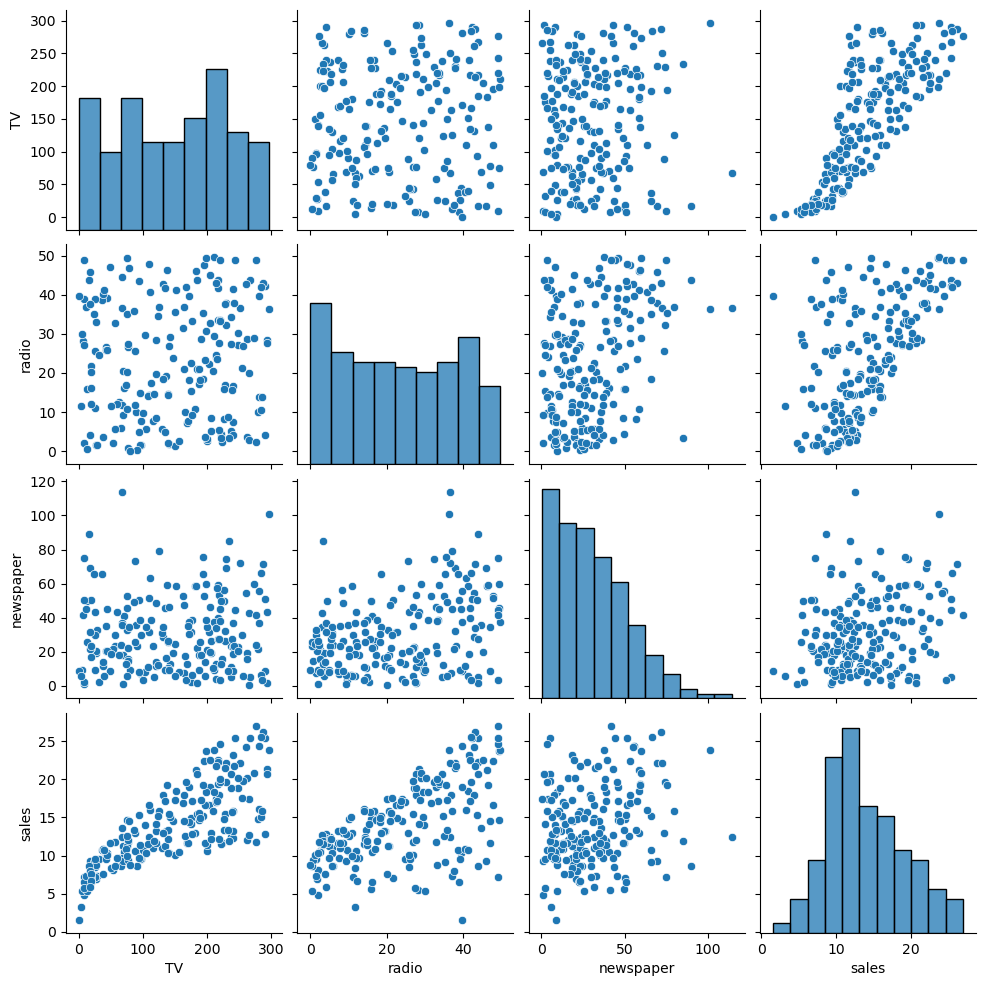

In [9]:
sns.pairplot(df_adv)

# Zad
Proszę wyrysować dane za pomoca 
```python
sns.heatmap()
```

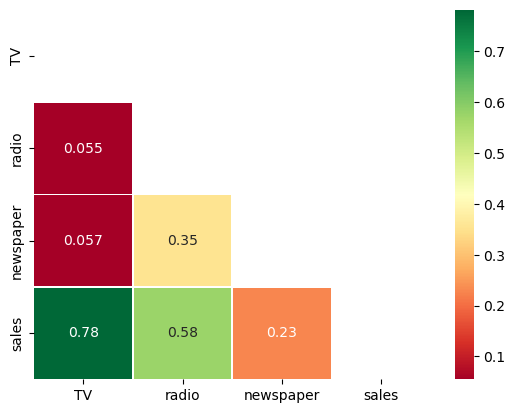

In [13]:
mask = np.zeros_like(df_adv.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df_adv.corr(), mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2)

# Zadanie 1 - Konkurs
Wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.


In [16]:
est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

#sales zalezna liniowo z TV, radio i newspaper

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2024-04-08 10:56   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [18]:
import statsmodels.formula.api as smf

est = smf.ols(formula='sales ~ I(newspaper)*I(TV)*I(radio)', data=df_adv).fit()
print((est.summary2()))

                     Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.968    
Dependent Variable:     sales              AIC:                  550.9065 
Date:                   2024-04-08 10:56   BIC:                  577.2930 
No. Observations:       200                Log-Likelihood:       -267.45  
Df Model:               7                  F-statistic:          847.3    
Df Residuals:           192                Prob (F-statistic):   1.16e-140
R-squared:              0.969              Scale:                0.88469  
--------------------------------------------------------------------------
                             Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
--------------------------------------------------------------------------
Intercept                    6.5559   0.4655 14.0825 0.0000  5.6377 7.4741
I(newspaper)                 0.0131   0.0172  0.7615 0.4473 -0.0208 0.0471
I(TV)                        0.0197   0.0027  7

In [27]:
est = smf.ols(formula='sales ~ I(newspaper) + I(TV) + I(radio) + I(radio**2) + I(TV ** 2) + I(TV**3)', data=df_adv).fit()
print(est.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.925    
Dependent Variable: sales            AIC:                717.3302 
Date:               2024-04-08 11:02 BIC:                740.4184 
No. Observations:   200              Log-Likelihood:     -351.67  
Df Model:           6                F-statistic:        409.8    
Df Residuals:       193              Prob (F-statistic): 6.37e-107
R-squared:          0.927            Scale:              2.0430   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       0.1846    0.4804   0.3843  0.7012  -0.7629   1.1321
I(newspaper)   -0.0008    0.0050  -0.1618  0.8717  -0.0107   0.0091
I(TV)           0.1321    0.0115  11.5028  0.0000   0.1094   0.1547
I(radio)        0.1652    0.0267   6.1808  0.0000   0.1125   0.2179
I(radi

In [29]:
est = smf.ols(formula='sales ~ I(TV) + I(radio) + I(TV**2) +  I(TV):I(radio)  + I(TV**3) + I(TV**4) + I(TV**5) + I(TV**6) ', data=df_adv).fit()
print((est.summary2()))


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.993    
Dependent Variable: sales            AIC:                254.6906 
Date:               2024-04-08 11:02 BIC:                281.0772 
No. Observations:   200              Log-Likelihood:     -119.35  
Df Model:           7                F-statistic:        3819.    
Df Residuals:       192              Prob (F-statistic): 2.20e-202
R-squared:          0.993            Scale:              0.20117  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          0.0304   0.0009  35.4285 0.0000  0.0287  0.0321
I(TV)              0.4284   0.0125  34.2664 0.0000  0.4037  0.4530
I(radio)           0.0570   0.0038  14.8385 0.0000  0.0495  0.0646
I(TV ** 2)        -0.0090   0.0004 -20.1913 0.0000 -0.0098 -0.0081
I(TV):I(radio

In [20]:
# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ I(newspaper)+I(TV):I(radio)+np.log(radio+1)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: sales            AIC:                685.7094 
Date:               2024-04-08 10:56 BIC:                698.9027 
No. Observations:   200              Log-Likelihood:     -338.85  
Df Model:           3                F-statistic:        955.0    
Df Residuals:       196              Prob (F-statistic): 1.16e-116
R-squared:          0.936            Scale:              1.7698   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          10.1955   0.3396 30.0181 0.0000  9.5257 10.8653
I(newspaper)        0.0003   0.0046  0.0574 0.9543 -0.0087  0.0093
I(TV):I(radio)      0.0016   0.0000 44.3924 0.0000  0.0015  0.0017
np.log(radio + 1)  -0.6088   0.1356 -4.4884 0.0000 -0.8763 -0.3413
-------------